In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from scipy import stats

In [5]:
stats.norm.cdf(680, loc=711,scale=29)

0.14254260383881612

In [6]:
beml_df = pd.read_csv(r"C:\Users\DANGE\Desktop\BEML.csv")

In [7]:
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [8]:
glaxo_df = pd.read_csv(r"C:\Users\DANGE\Desktop\GLAXO.csv")

In [9]:
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [10]:
beml_df = beml_df[['Date','Close']]
glaxo_df = glaxo_df[['Date','Close']]

In [11]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [12]:
'''The Dataframes have a date column, so we can
create a datetimeindex index from this column Date. it will ensure that the rows are sorted by time in
ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df["Date"]))
beml_df = beml_df.set_index(pd.DatetimeIndex(glaxo_df["Date"]))

Text(0, 0.5, 'Close price')

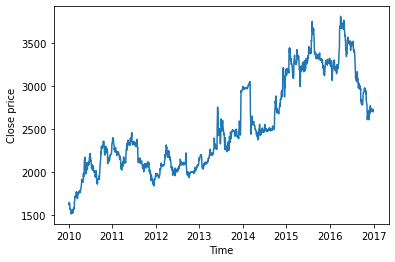

In [13]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close price')

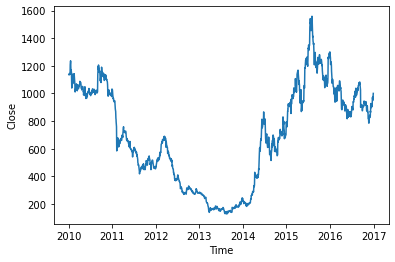

In [14]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [15]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods=1)
beml_df['gain'] = beml_df.Close.pct_change(periods=1)

In [16]:
#drop first row since it is now
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

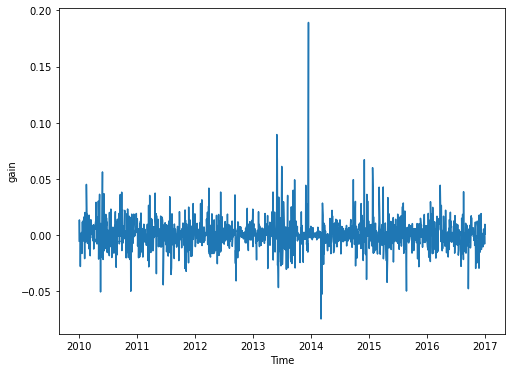

In [18]:
#plot gains
plt.figure(figsize=(8 ,6));
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

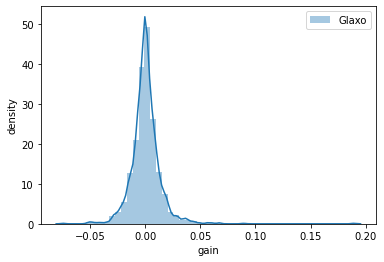

In [24]:
sn.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('density');
plt.legend();

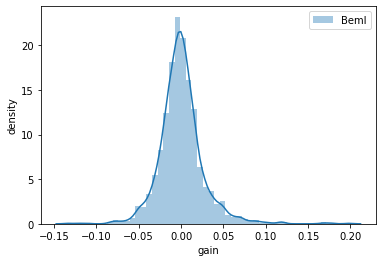

In [25]:
sn.distplot(beml_df.gain, label = 'Beml');
plt.xlabel('gain');
plt.ylabel('density');
plt.legend();

In [20]:
print('Mean:', round(glaxo_df.gain.mean(),4))
print('standard Deviation: ', round(glaxo_df.gain.std(),4))

Mean: 0.0004
standard Deviation:  0.0134


In [22]:
print('Mean:', round(beml_df.gain.mean(),4))
print('standard Deviation: ', round(beml_df.gain.std(),4))

Mean: 0.0003
standard Deviation:  0.0264


In [23]:
from scipy import stats
#probability of making 2% loss or higher in glaxo
stats.norm.cdf( -0.02,
loc= glaxo_df.gain.mean(),
scale = glaxo_df.gain.std())

0.06352488667177397

In [ ]:
#probabbility of making 2% gain or higher in glaxo
1 - stats.norm.cdf(0.02,
loc= glaxo_df.gain.mean(),
scale = glaxo_df.gain.std())

In [27]:
#probability of making 2% loss or higher in beml
stats.norm.cdf( -0.02,
loc= beml_df.gain.mean(),
scale = beml_df.gain.std())

0.22155987503755292

In [28]:
#probabbility of making 2% gain or higher in beml
1 - stats.norm.cdf(0.02,
loc= beml_df.gain.mean(),
scale = beml_df.gain.std())

0.22769829484075343